In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 1.Problem Statement:

# Target Variable : label

# Independent Variables :
# N
# P
# K
# temperature
# humidity
# ph
# rainfall

In [ ]:
# 2.Data Gathering :

In [7]:
df=pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# 3.EDA

1.Finding Null Values

In [8]:
df.isna().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
# There are no missing values in any column

2.Finding Independent variable which are in object form

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# There are no coulumns which are in object form.

3.Detecting Outliers

<Axes: >

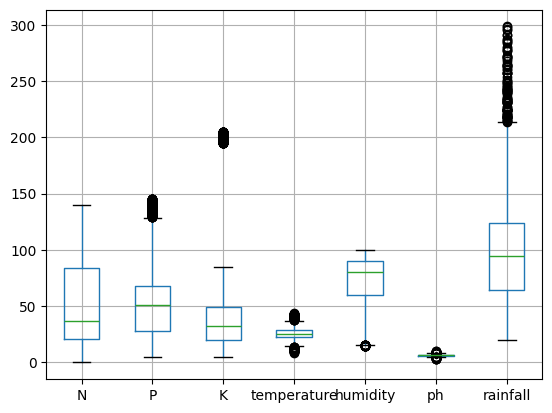

In [10]:
df.boxplot()

In [56]:
# 4.Feature Engineering:

<Axes: ylabel='N'>

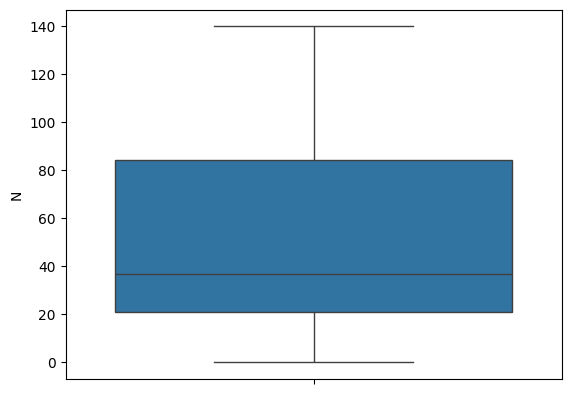

In [11]:
sns.boxplot(df['N'])

<Axes: ylabel='P'>

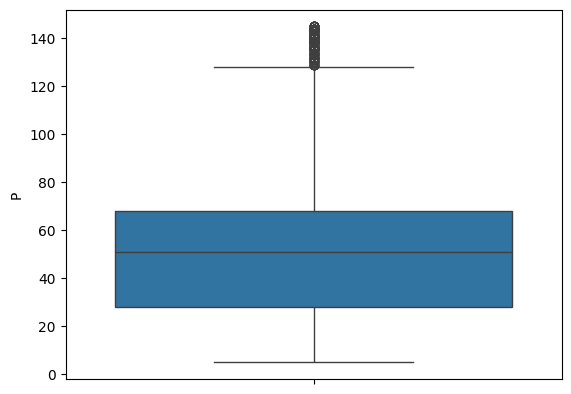

In [13]:
sns.boxplot(df['P'])

<Axes: ylabel='P'>

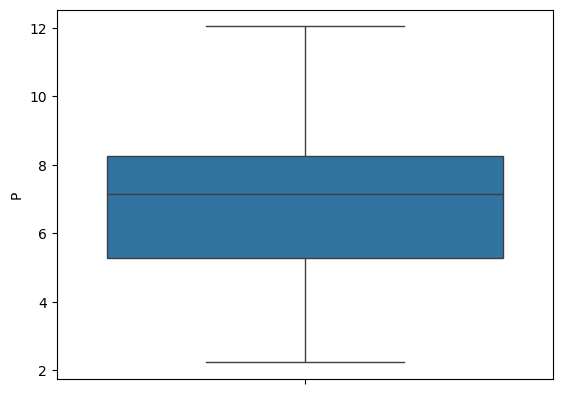

In [16]:
sns.boxplot(np.sqrt(df['P']))

<Axes: ylabel='K'>

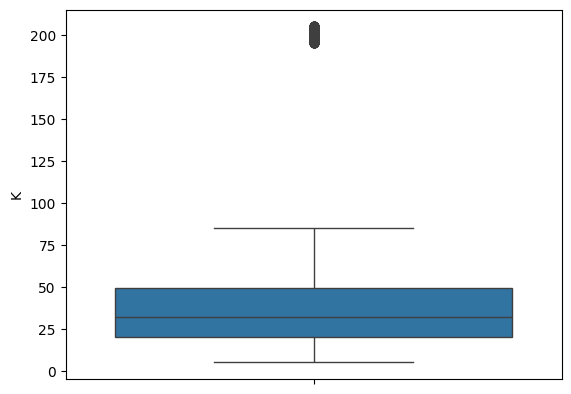

In [17]:
sns.boxplot(df['K'])

<Axes: ylabel='K'>

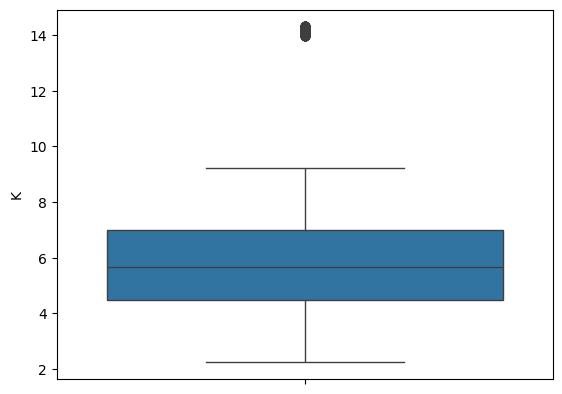

In [23]:
sns.boxplot(np.sqrt(df['K']))

<Axes: ylabel='temperature'>

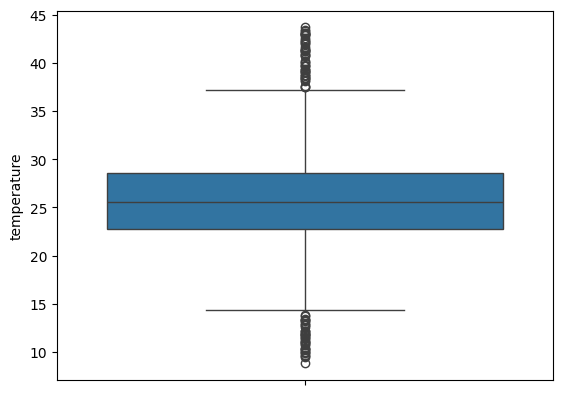

In [24]:
sns.boxplot(df['temperature'])

<Axes: ylabel='temperature'>

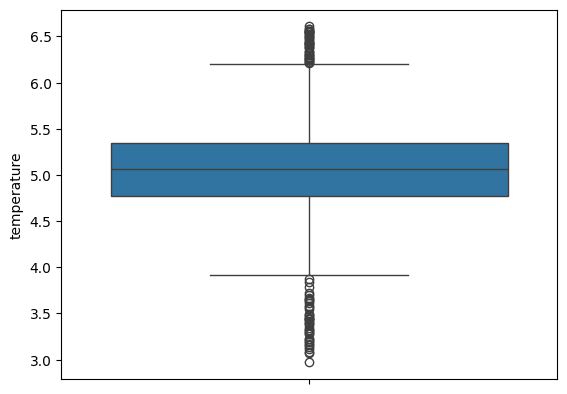

In [32]:
sns.boxplot(np.sqrt(df['temperature']))

<Axes: ylabel='humidity'>

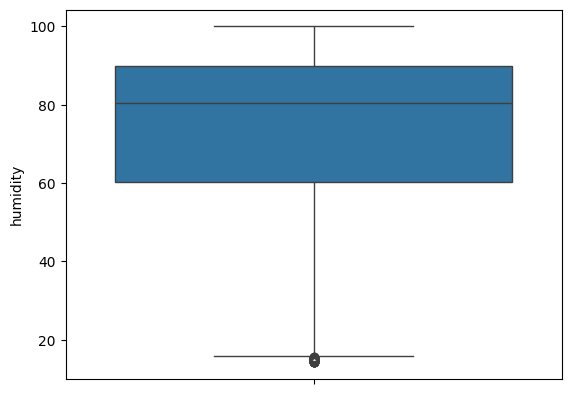

In [33]:
sns.boxplot(df['humidity'])

<Axes: ylabel='ph'>

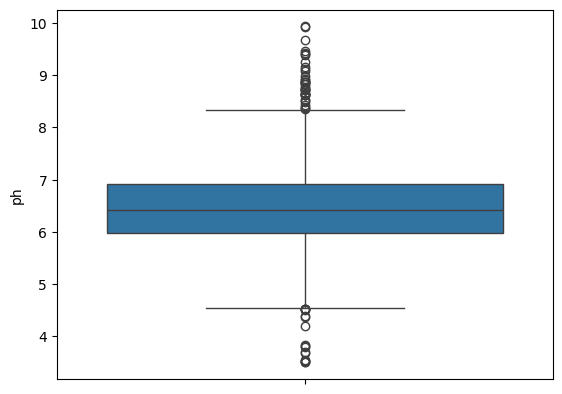

In [39]:
sns.boxplot(df['ph'])

<Axes: ylabel='ph'>

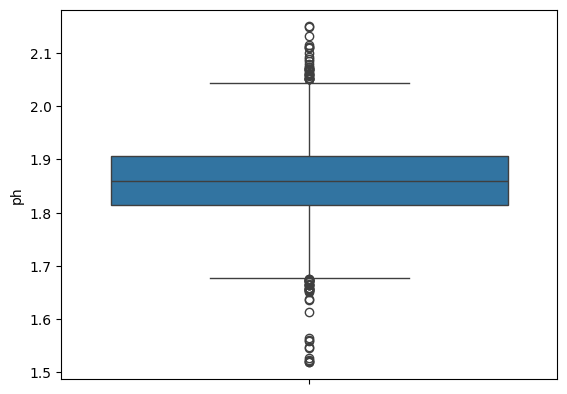

In [45]:
sns.boxplot(np.cbrt(df['ph']))

<Axes: ylabel='rainfall'>

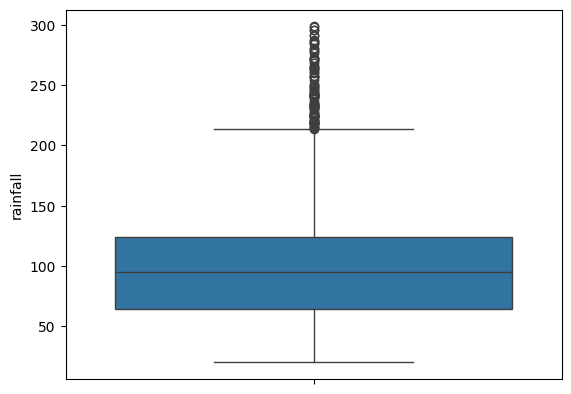

In [46]:
sns.boxplot(df['rainfall'])

<Axes: ylabel='rainfall'>

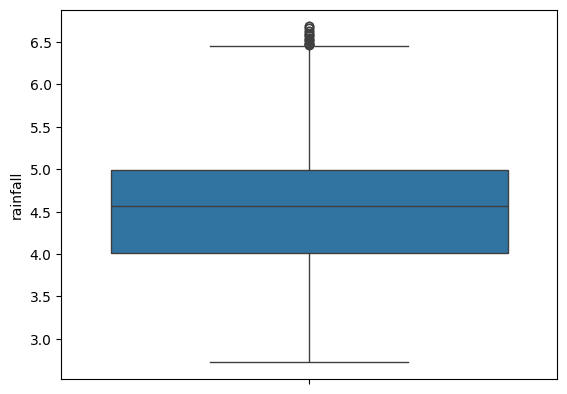

In [54]:
sns.boxplot(np.cbrt(df['rainfall']))

In [55]:
# Here we handled the outliers in independent columns.

In [58]:
# 5.Feature Selection:

In [60]:
x=df.drop('label',axis=1)
y=df['label']

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [62]:
# 6.Model Building:

In [64]:
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [65]:
y_pred=rf_model.predict(x_test)

Testing Accuracy:

In [69]:
cnf=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",cnf)

class_report=classification_report(y_test,y_pred)
print("Classification Report:",class_report)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",accuracy)

Confusion Matrix: [[22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [72]:
y_pred_train=rf_model.predict(x_train)

Tranning Accuracy:

In [73]:
cnf=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:",cnf)

class_report=classification_report(y_train,y_pred_train)
print("Classification Report:",class_report)

accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

Confusion Matrix: [[78  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 78  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 85  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 83  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 76  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [87]:
with open("rf_model_crop.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")


Model saved successfully!


In [88]:
import pickle


with open("rf_model_crop.pkl", "rb") as file:
    model = pickle.load(file)


sample_data = [[65,78,90,40.10,80.16,6.98,100.19]]
prediction = model.predict(sample_data)

print("Prediction:", prediction)


Prediction: ['banana']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
